In [92]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
def prettify(plt):
    plt.grid(False)
    plt.xticks([],[])
    plt.xlabel('')

In [93]:
# os.listdir('../input/stack-overflow-developer-survey-2020/developer_survey_2020')
path = '../input/stack-overflow-developer-survey-2020/developer_survey_2020/survey_results_public.csv'
df = pd.read_csv(path)

In [101]:
dfp = df[df.Country=='Pakistan']
dfp.head(2)

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,CurrencySymbol,DatabaseDesireNextYear,DatabaseWorkedWith,DevType,EdLevel,Employment,Ethnicity,Gender,JobFactors,JobSat,JobSeek,LanguageDesireNextYear,LanguageWorkedWith,MiscTechDesireNextYear,MiscTechWorkedWith,NEWCollabToolsDesireNextYear,NEWCollabToolsWorkedWith,NEWDevOps,NEWDevOpsImpt,NEWEdImpt,NEWJobHunt,NEWJobHuntResearch,NEWLearn,NEWOffTopic,NEWOnboardGood,NEWOtherComms,NEWOvertime,NEWPurchaseResearch,NEWPurpleLink,NEWSOSites,NEWStuck,OpSys,OrgSize,PlatformDesireNextYear,PlatformWorkedWith,PurchaseWhat,Sexuality,SOAccount,SOComm,SOPartFreq,SOVisitFreq,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
199,201,I am a developer by profession,Yes,27.0,18,NaN,NaN,NaN,Pakistan,Pakistani rupee,PKR,Couchbase;Elasticsearch;Firebase;MongoDB;MySQL...,Couchbase;MongoDB;PostgreSQL,"Developer, back-end;Developer, desktop or ente...","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,South Asian,Man,Flex time or a flexible schedule;How widely us...,Slightly satisfied,"I’m not actively looking, but I am open to new...",Dart;Go;HTML/CSS;Java;JavaScript;Python;Rust;T...,Bash/Shell/PowerShell;HTML/CSS;Java;JavaScript...,.NET Core;Flutter;Node.js;Pandas;React Native;...,Cordova;Node.js,Confluence;Jira;Github;Trello;Google Suite (Do...,Confluence;Jira;Github;Gitlab;Trello;Google Su...,No,Extremely important,Very important,Curious about other opportunities;Better compe...,"Read company media, such as employee blogs or ...",Every few months,No,Yes,Yes,Occasionally: 1-2 days per quarter but less th...,Start a free trial;Ask developers I know/work ...,"Hello, old friend",Stack Overflow (public Q&A for anyone who code...,Play games;Call a coworker or friend;Visit Sta...,MacOS,20 to 99 employees,AWS;Docker;Google Cloud Platform;Kubernetes;Li...,Android;Arduino;AWS;Docker;iOS;Linux;MacOS,I have some influence,Straight / Heterosexual,Yes,"Yes, definitely",Daily or almost daily,Multiple times per day,Easy,Appropriate in length,No,"Computer science, computer engineering, or sof...",Angular;Django;Express;React.js;Spring,Angular;Angular.js;Express;jQuery;Spring,Just as welcome now as I felt last year,40.0,9,4
567,569,I am a developer by profession,No,32.0,22,Monthly,220000.0,17124.0,Pakistan,Pakistani rupee,PKR,Firebase;MongoDB;Redis,NaN,"Developer, front-end;Developer, full-stack","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,South Asian,Man,"Languages, frameworks, and other technologies ...",Slightly dissatisfied,I am actively looking for a job,JavaScript;SQL;TypeScript,HTML/CSS;JavaScript,Node.js,NaN,"Jira;Github;Slack;Trello;Google Suite (Docs, M...","Jira;Github;Slack;Trello;Google Suite (Docs, M...",Yes,Extremely important,Somewhat important,Curious about other opportunities;Better compe...,"Read company media, such as employee blogs or ...",Every few months,No,Onboarding? What onboarding?,No,Rarely: 1-2 days per year or less,Ask developers I know/work with;Visit develope...,Annoyed,Stack Overflow (public Q&A for anyone who code...,Call a coworker or friend;Visit Stack Overflow...,MacOS,100 to 499 employees,MacOS,MacOS,I have a great deal of influence,Straight / Heterosexual,Yes,"Yes, somewhat",A few times per month or weekly,Daily or almost daily,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",Express;jQuery;React.js;Vue.js,jQuery,A lot less welcome now than last year,40.0,8,6


In [100]:
dfp.groupby(['Country']).mean()

,Respondent,Age,CompTotal,ConvertedComp,WorkWeekHrs
Country,,,,,
Pakistan,34614.991347,25.447146,132873.92145,14581.384848,40.22125


In this notebook, I will be visualizing different components of the Stack Overflow survey 2020 for my country Pakistan only.

# Ethinicity

Most of the folks are South Asian. <br>
But there are other diverse ethnic groups as well.

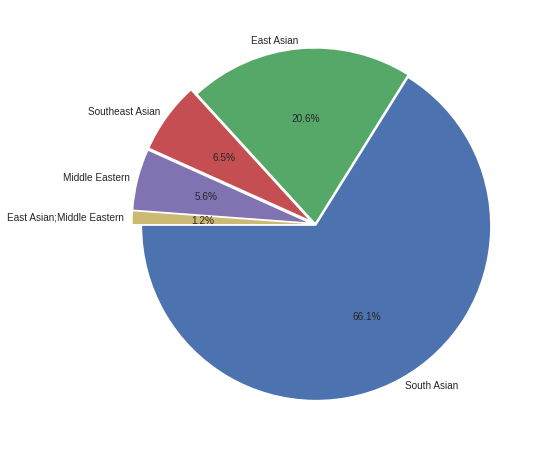

In [5]:
plt.style.use('seaborn')

dft = dfp.groupby(['Ethnicity']).count().sort_values('Respondent', ascending=False).head(5)
fig = plt.figure(figsize=(8,8))
explode = [0.01, 0.01, 0.05, 0.05, 0.05]
plt.pie(dft.Respondent, labels=dft.index,labeldistance=1.05, explode=explode,
        autopct='%.1f%%', startangle=180)

plt.show()

# Gender and Sexuality

### Gender

IT industry is mostly men-dominated followed by a fewer number of women

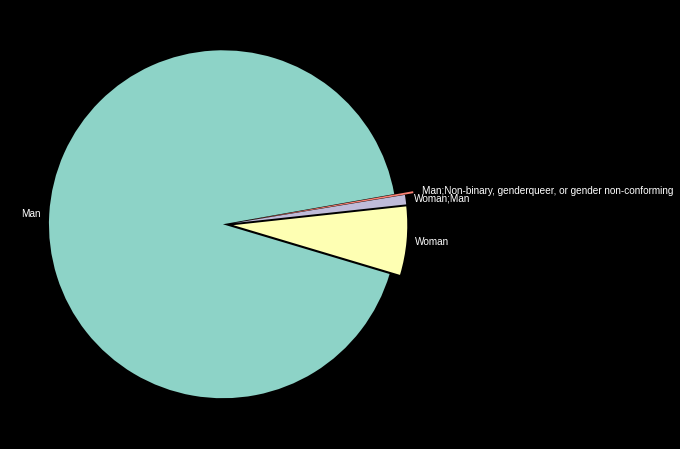

In [6]:
plt.style.use('dark_background')

dft = dfp.groupby(['Gender']).count().sort_values('Respondent', ascending=False)
fig = plt.figure(figsize=(8,8))
explode = [0.01, 0.05, 0.05, 0.1]
plt.pie(dft.Respondent, labels=dft.index,labeldistance=1.05,
        explode=explode, startangle=10 )
plt.show()
plt.style.use('default')

### Sexual Orientation

Most of the Pakistanis are straight.<br>


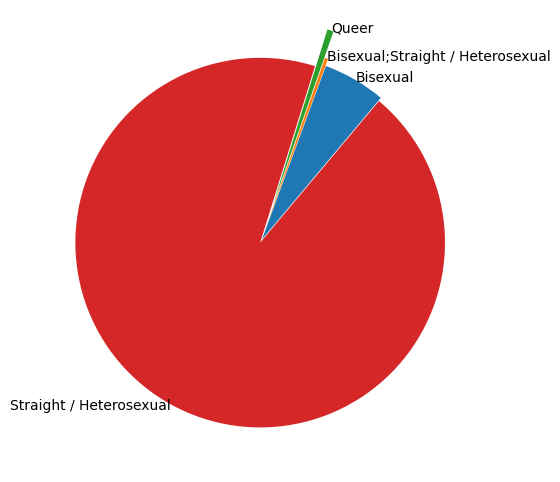

In [7]:
plt.style.use('default')

dft = dfp.groupby(['Sexuality']).count()
fig = plt.figure(figsize=(6,6))
explode = [0.01, 0.05, 0.2, 0.01]
plt.pie(dft.Respondent,labels=dft.index,labeldistance=1.01,
        explode=explode, startangle=50 )
plt.show()

# Age and Education

### Age

Most of the Pakistanis has age between between 17 - 35. <br>
The mean age of Pakistani Respondents is ~25. Whereas the mean age worldwide is ~30

note: This is a violinplot. Its thickness(yaxis) shows frequency and its length shows range. The dotted lines represents quartiles 
with middle dotted line being the mean value

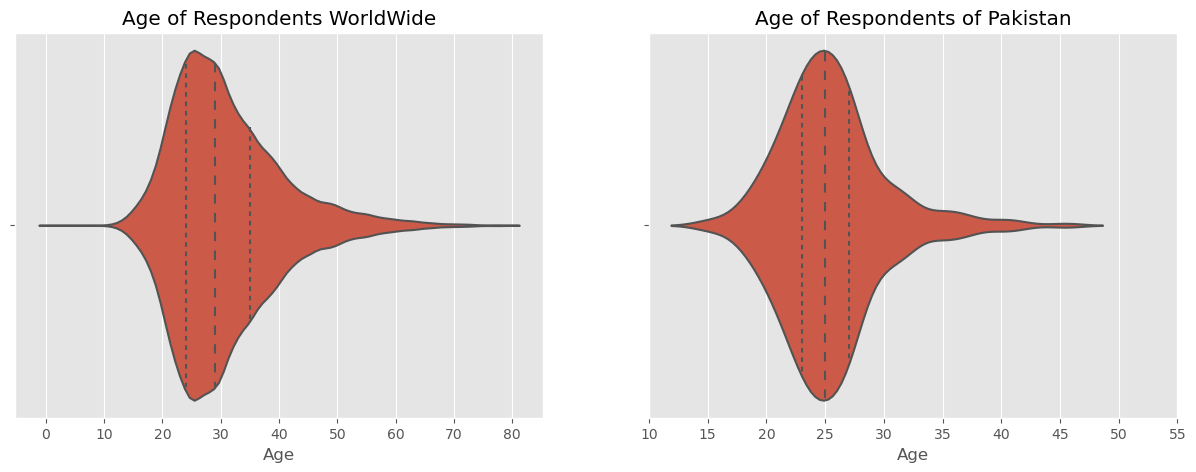

In [8]:
plt.style.use('ggplot')

dft = df.groupby(['Country']).count()

fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(15,5))

sns.violinplot(df.Age.where(df.Age<80), inner='quartile', ax=ax[0])
ax[0].set_xticks(np.arange(0, 90, 10))
ax[0].set_title('Age of Respondents WorldWide')

sns.violinplot(df.Age.where(df.Country=='Pakistan'),  inner='quartile',ax=ax[1])
ax[1].set_xticks(np.arange(10, 60, 5))
ax[1].set_title('Age of Respondents of Pakistan')

ax[0].set_xlabel('Age')
ax[1].set_xlabel('Age')

plt.show()

### Education Levels

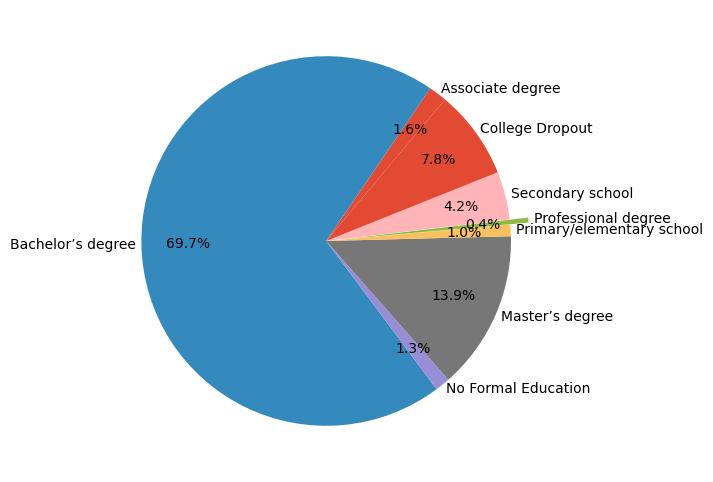

In [9]:
plt.style.use('fast')

dft = dfp.groupby(['EdLevel']).count()
EdLvl = [
    x[:x.find('(')-1] if x.find('(')!=-1
    else "No Formal Education" if x.find('formal')!=-1
    else "College Dropout" if x.find('without earning')!=-1
    else x
    for x in dft.index 
]
pies = [dft.Respondent[dft.index==x][0] for x in dft.index]

fig = plt.figure(figsize=(6,6))
plt.pie(pies, labels=EdLvl, startangle=50, autopct="%.1f%%", pctdistance=0.75,
       labeldistance=1.03, explode=[0,0,0,0,0,0.1,0,0])
# ax.set_title('Education Levels',fontdict={'fontsize':30})

plt.savefig('4.png', dpi=200, bbox_inches='tight')
plt.style.use('default')

### Mean age of various Education Levels

This holds true as Master's degree holder have higher mean age and those in primary school have lower mean age.

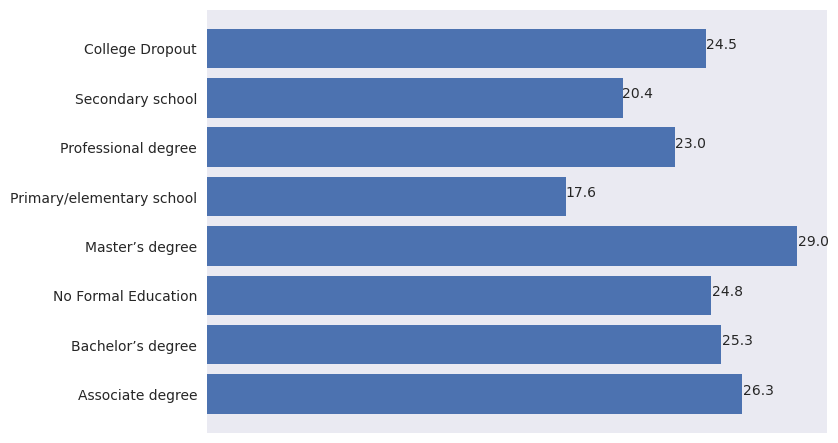

In [10]:
plt.style.use('seaborn')

dft = dfp.groupby(['EdLevel']).mean()

fig = plt.figure()
plt.barh(EdLvl, dft.Age)

for i, x in enumerate(round(dft.Age,1)):
    plt.annotate(x, (x,i))

prettify(plt)

plt.style.use('default')

# Employment

### Employment Status

1. Most are employed full time
2. Lots of Respondents are students 

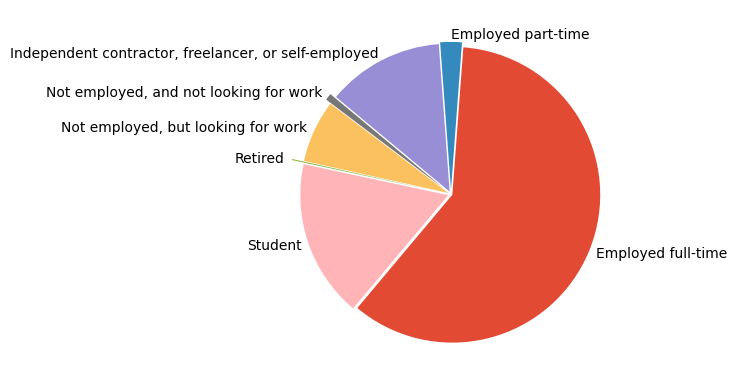

In [11]:
plt.style.use('ggplot')

dft = dfp.groupby(['Employment']).count()

fig = plt.figure()

plt.pie(dft.Respondent, labels=dft.index, startangle=-130,
       explode=[0.01, 0.03, 0.02, 0.06, 0.02, 0.1, 0.02],
        labeldistance=1.05)

plt.show()

plt.style.use('default')

### Mean Age Of Various Employments

Makes sense as Employed folks have higher mean ages and Students have lower mean ages<br>
Retired folks didn't provide their age

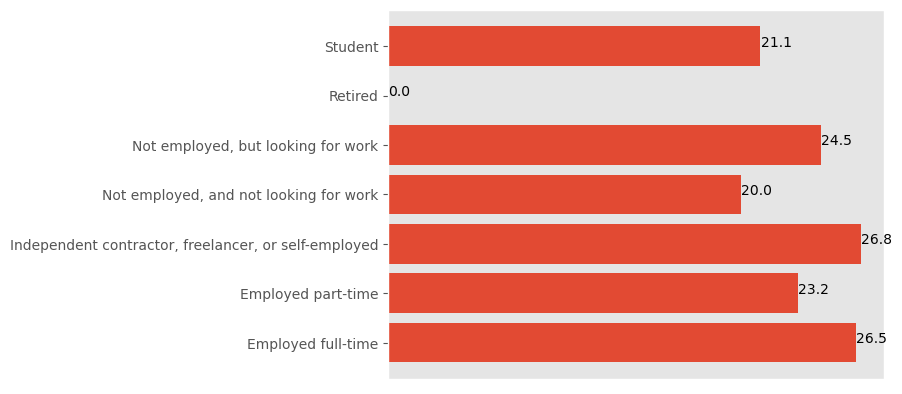

In [12]:
plt.style.use('ggplot')

dft = dfp.groupby(['Employment']).mean()
dft.Age.Retired = 0
fig = plt.figure()

plt.barh(dft.index, dft.Age)
plt.xlabel('Age')
for i, x in enumerate(round(dft.Age,1)):
    plt.annotate(x, (x,i))
prettify(plt)
plt.show()

# Coding Experience

### Written their First Code

1. Most of the people in Pak wrote their first code at age 15-22 whereas worldwide it's 10-20
2. Mean age in Pak is ~18 years and worldwide is ~15 years

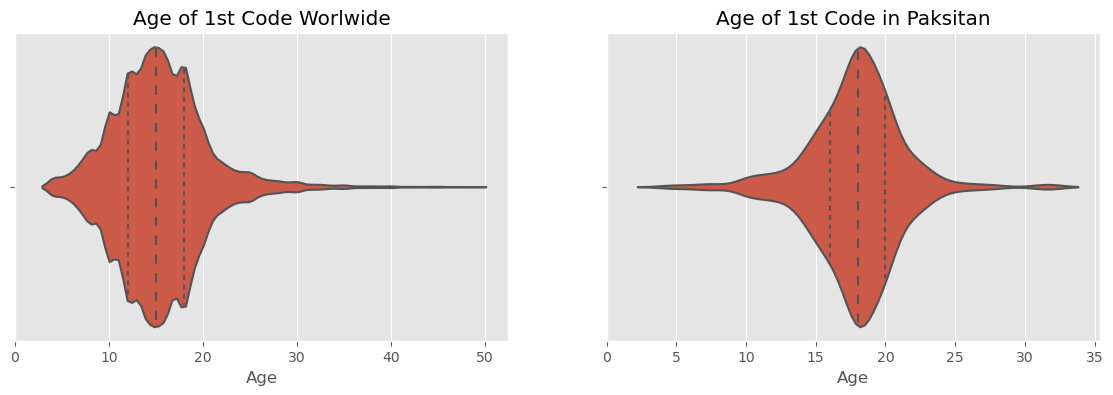

In [13]:
plt.style.use('ggplot')

fig, ax = plt.subplots(ncols=2, figsize=(14,4))
dfp.Age1stCode.replace('Younger than 5 years', '4', inplace=True)
dfp.Age1stCode.replace('Older than 85', '86', inplace=True)
df.Age1stCode.replace('Younger than 5 years', '4', inplace=True)
df.Age1stCode.replace('Older than 85', '86', inplace=True)
df.Age1stCode = df.Age1stCode.astype('float')
dfp.Age1stCode = df.Age1stCode.astype('float')

sns.violinplot(df.Age1stCode.where(df.Age1stCode<50), inner='quartile', ax=ax[0])
sns.violinplot(dfp.Age1stCode, inner='quartile', ax=ax[1])

ax[0].set_title('Age of 1st Code Worlwide')
ax[1].set_title('Age of 1st Code in Paksitan')

ax[0].set_xticks(np.arange(0,60,10))
ax[1].set_xticks(np.arange(0,40,5))

ax[0].set_xlabel('Age')
ax[1].set_xlabel('Age')

plt.style.use('default')

### Coding Experience and Professional Coding Experience

1. Most of the Respondents have Coding experience of 4-8 years with maximum being ~30 years
2. Most of the Respondents have Professional Coding experience of >5 years with maximum being ~20 years

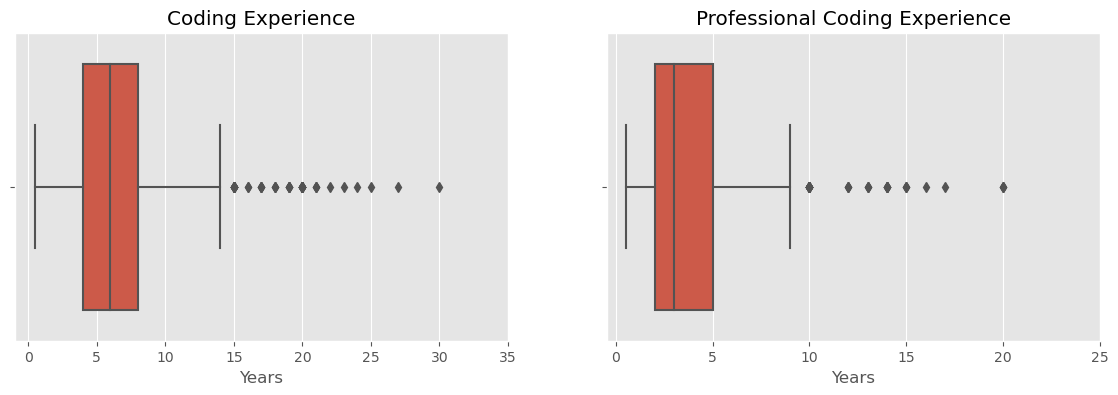

In [14]:
plt.style.use('ggplot')

fig, ax = plt.subplots(ncols=2, figsize=(14,4))

dfp.YearsCode.replace('Less than 1 year', 0.5, inplace=True)
dfp.YearsCodePro.replace('Less than 1 year', 0.5, inplace=True)
dfp.YearsCode = dfp.YearsCode.astype('float')
dfp.YearsCodePro = dfp.YearsCodePro.astype('float')

sns.boxplot(dfp.YearsCode.dropna(), ax=ax[0])
sns.boxplot(dfp.YearsCodePro.dropna(), ax=ax[1])

ax[0].set_title('Coding Experience')
ax[1].set_title('Professional Coding Experience')

ax[0].set_xticks(np.arange(0,40,5))
ax[1].set_xticks(np.arange(0,30,5))

ax[0].set_xlabel('Years')
ax[1].set_xlabel('Years')


plt.style.use('default')

# Technology

### Primary Operating System For Work

Most people use windows and few people use MacOS

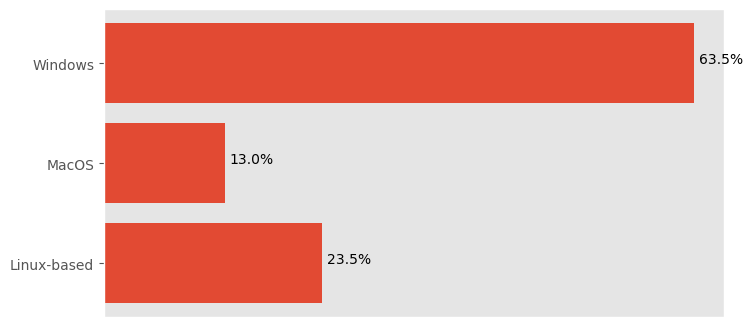

In [33]:
plt.style.use('ggplot')
dft = dfp.groupby(['OpSys']).Respondent.count()

types = [x for x in dft.index]
pcnts = [round(100*dft[x]/nums,1) for x in dft.index]

fig= plt.figure(figsize=(8,4))
plt.barh(types, pcnts)

for y, p in enumerate(pcnts):
  plt.annotate("%.1f%%"%p, (p+0.5, y))
prettify(plt)

plt.style.use('default')

### Misc Techs Worked With

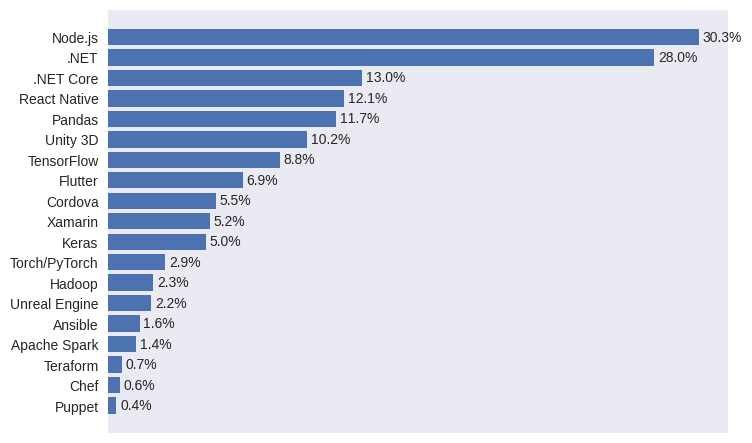

In [49]:
plt.style.use('seaborn')

mt = {}
for x in dfp.MiscTechWorkedWith.dropna():
    for d in x.split(';'):
        if d not in mt:
            mt[d] = 1   # create new instance
        else:
            mt[d] += 1  # increments that instance           
mt = {k:v for k,v in sorted(mt.items(), key=lambda x:x[1])}
pos = np.arange(0,len(mt.keys()), 1)
labels = [x for x in mt.keys()]
tot = dfp.LanguageWorkedWith.count()
pcnts = [round(100*x/tot, 1) for x in mt.values()]

fig = plt.figure()
plt.barh(labels, pcnts)

for i, x in enumerate(pcnts):
    plt.annotate('%.1f%%'%x, (x+0.2, i-0.2))
prettify(plt)
    

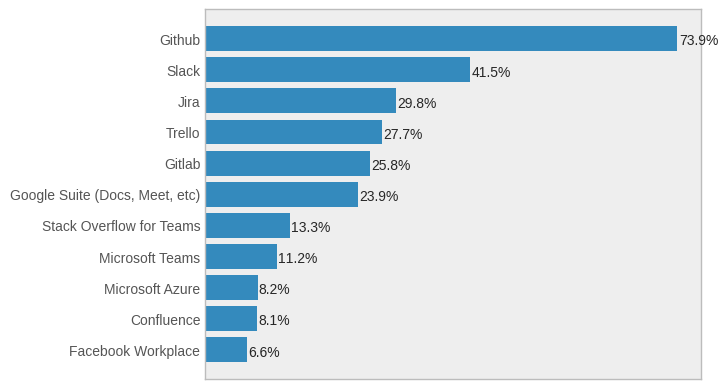

In [110]:
plt.style.use('bmh')

mt = {}
for x in dfp.NEWCollabToolsWorkedWith.dropna():
    for d in x.split(';'):
        if d not in mt:
            mt[d] = 1   # create new instance
        else:
            mt[d] += 1  # increments that instance           
mt = {k:v for k,v in sorted(mt.items(), key=lambda x:x[1])}
pos = np.arange(0,len(mt.keys()), 1)
labels = [x for x in mt.keys()]
tot = dfp.LanguageWorkedWith.count()
pcnts = [round(100*x/tot, 1) for x in mt.values()]

fig = plt.figure()
plt.barh(labels, pcnts)

for i, x in enumerate(pcnts):
    plt.annotate('%.1f%%'%x, (x+0.2, i-0.2))
prettify(plt)
    

# Languages Worked With

Note that a Respondent could mark mutliple languages, thus the percentage sum crosses well above 100.
70% of Respondents have worked with JavaScript. Woah. (and here I am dont know a thing about JS)<br>
Our python stands at 7th position. BTW, in world overall, python was at number 4.<br>

(expand the output below to watch all of the languages stats)

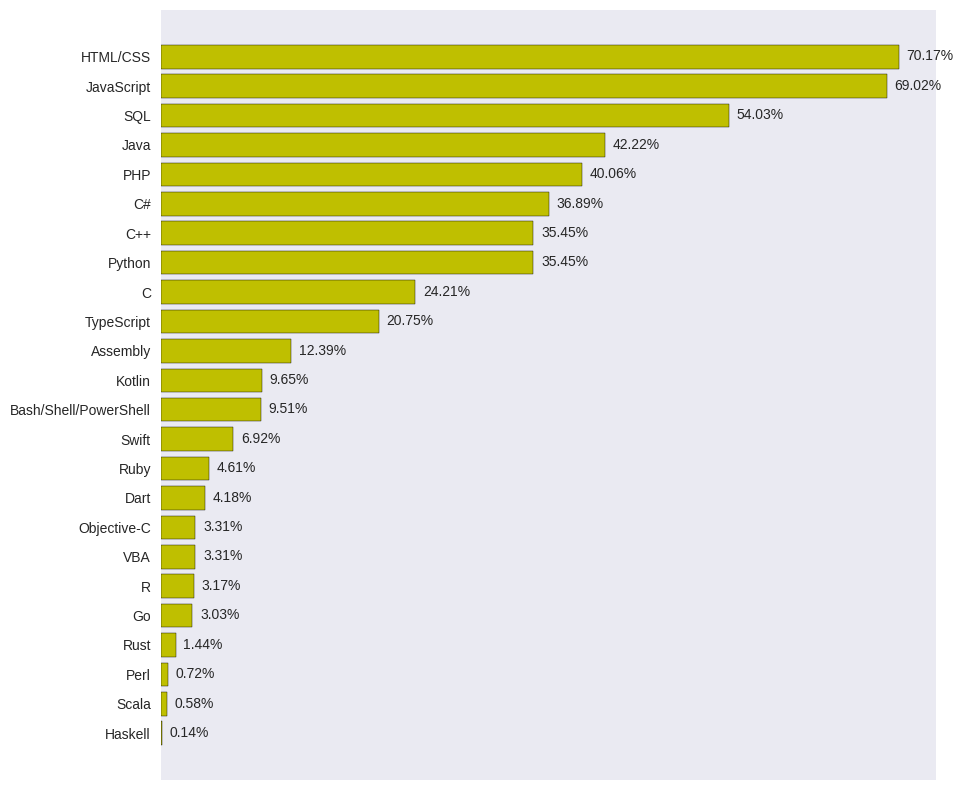

In [50]:
plt.style.use('seaborn-dark')

# current lw users
lw = {}
for x in dfp.LanguageWorkedWith.dropna():
    for d in x.split(';'):
        if d not in lw:
            lw[d] = 1   # create new instance
        else:
            lw[d] += 1  # increments that instance           
lw = {k:v for k,v in sorted(lw.items(), key=lambda x:x[1])}
pos = np.arange(0,len(lw.keys()), 1)
labels = [x for x in lw.keys()]
tot = dfp.LanguageWorkedWith.count()
pcnts = [round(100*x/tot, 2) for x in lw.values()]

fig = plt.figure(figsize=(10,10))

plt.barh(labels, list(lw.values()), color='y', edgecolor='k')

for (y, p), x  in zip(enumerate(pcnts), lw.values()):
   plt.annotate("%.2f%%"%p, (x+5 ,y-0.125))
prettify(plt)


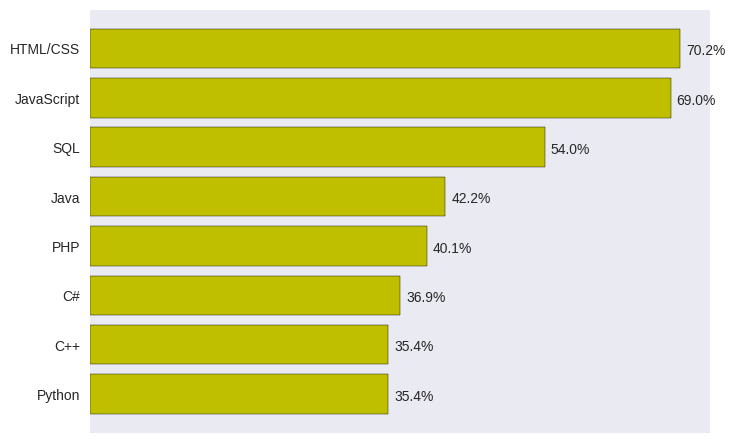

In [51]:
plt.style.use('seaborn-dark')

# current lw users
lw = {}
for x in dfp.LanguageWorkedWith.dropna():
    for d in x.split(';'):
        if d not in lw:
            lw[d] = 1   # create new instance
        else:
            lw[d] += 1  # increments that instance           
lw = {k:v for k,v in sorted(lw.items(), key=lambda x:x[1])}
pos = np.arange(0,len(lw.keys()), 1)
labels = [x for x in lw.keys()]
tot = dfp.LanguageWorkedWith.count()
pcnts = [round(100*x/tot, 1) for x in lw.values()]

fig = plt.figure()

plt.barh(labels[-8:], list(lw.values())[-8:], color='y', edgecolor='k')

for (y, p), x  in zip(enumerate(pcnts[-8:]), list(lw.values())[-8:]):
   plt.annotate("%.1f%%"%p, (x+5 ,y-0.125))
prettify(plt)


### Languages Desired

Glad to know python is most desired language

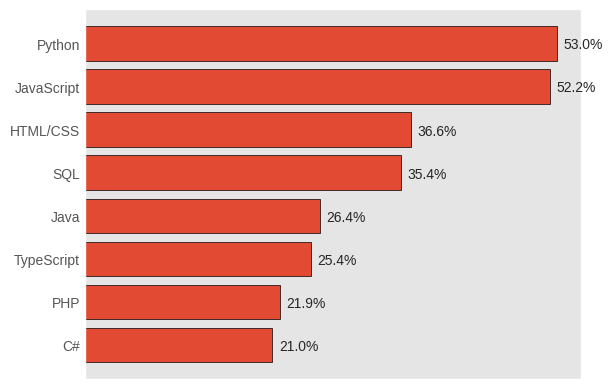

In [109]:
plt.style.use('ggplot')

# current lw users
lw = {}
for x in dfp.LanguageDesireNextYear.dropna():
    for d in x.split(';'):
        if d not in lw:
            lw[d] = 1   # create new instance
        else:
            lw[d] += 1  # increments that instance           
lw = {k:v for k,v in sorted(lw.items(), key=lambda x:x[1])}
pos = np.arange(0,len(lw.keys()), 1)
labels = [x for x in lw.keys()]
tot = dfp.LanguageWorkedWith.count()
pcnts = [round(100*x/tot, 1) for x in lw.values()]

fig = plt.figure()

plt.barh(labels[-8:], list(lw.values())[-8:], edgecolor='k')

for (y, p), x  in zip(enumerate(pcnts[-8:]), list(lw.values())[-8:]):
   plt.annotate("%.1f%%"%p, (x+5 ,y-0.125))
prettify(plt)


### Databases worked with

MySQL is the most popular database.

(expand the output below to view all of databases worked with)

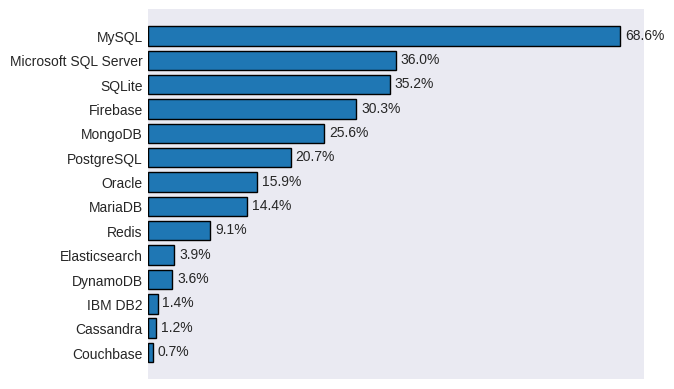

In [105]:
plt.style.use('seaborn-dark')

# current lw users
lw = {}
for x in dfp.DatabaseWorkedWith.dropna():
    for d in x.split(';'):
        if d not in lw:
            lw[d] = 1   # create new instance
        else:
            lw[d] += 1  # increments that instance           
lw = {k:v for k,v in sorted(lw.items(), key=lambda x:x[1])}
pos = np.arange(0,len(lw.keys()), 1)
labels = [x for x in lw.keys()]
tot = dfp.LanguageWorkedWith.count()
pcnts = [round(100*x/tot, 1) for x in lw.values()]

fig = plt.figure()

plt.barh(labels, list(lw.values()), edgecolor='k')

for (y, p), x  in zip(enumerate(pcnts), list(lw.values())):
   plt.annotate("%.1f%%"%p, (x+5 ,y-0.125))
prettify(plt)


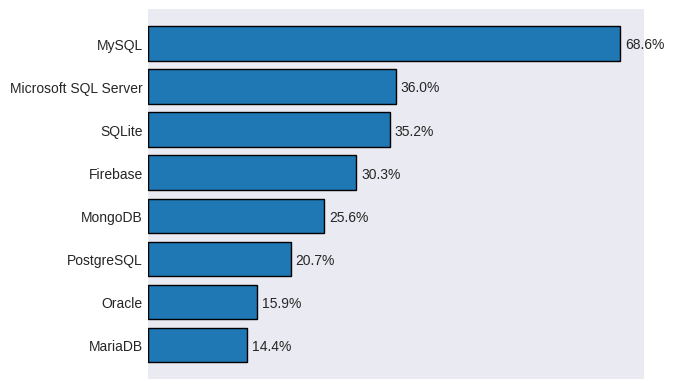

In [106]:
plt.style.use('seaborn-dark')

# current lw users
lw = {}
for x in dfp.DatabaseWorkedWith.dropna():
    for d in x.split(';'):
        if d not in lw:
            lw[d] = 1   # create new instance
        else:
            lw[d] += 1  # increments that instance           
lw = {k:v for k,v in sorted(lw.items(), key=lambda x:x[1])}
pos = np.arange(0,len(lw.keys()), 1)
labels = [x for x in lw.keys()]
tot = dfp.LanguageWorkedWith.count()
pcnts = [round(100*x/tot, 1) for x in lw.values()]

fig = plt.figure()

plt.barh(labels[-8:], list(lw.values())[-8:], edgecolor='k')

for (y, p), x  in zip(enumerate(pcnts[-8:]), list(lw.values())[-8:]):
   plt.annotate("%.1f%%"%p, (x+5 ,y-0.125))
prettify(plt)


### Developer Type

Most of the folks works as front-end, fullstack, backend and app developers<br>

(expand the output below to view all of DevTypes)

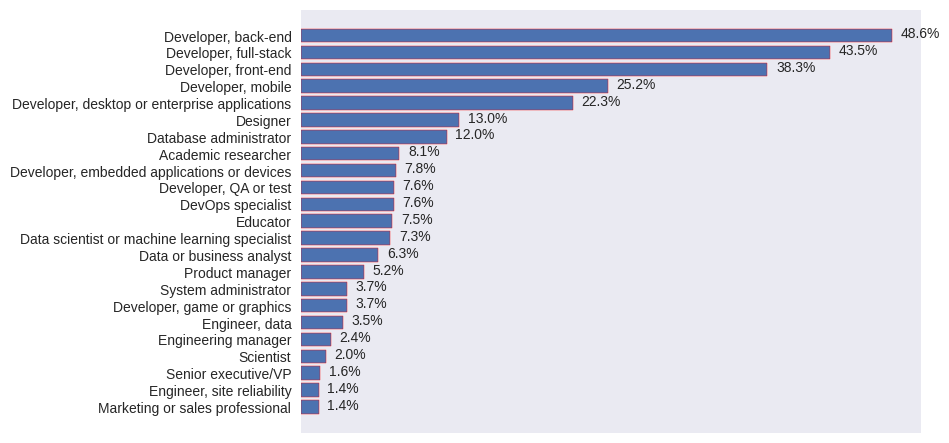

In [87]:
plt.style.use('seaborn')

# current lw users
lw = {}
for x in dfp.DevType.dropna():
    for d in x.split(';'):
        if d not in lw:
            lw[d] = 1   # create new instance
        else:
            lw[d] += 1  # increments that instance           
lw = {k:v for k,v in sorted(lw.items(), key=lambda x:x[1])}
pos = np.arange(0,len(lw.keys()), 1)
labels = [x for x in lw.keys()]
tot = dfp.LanguageWorkedWith.count()
pcnts = [round(100*x/tot, 1) for x in lw.values()]

fig = plt.figure()

plt.barh(labels, list(lw.values()), edgecolor='r')

for (y, p), x  in zip(enumerate(pcnts), list(lw.values())):
   plt.annotate("%.1f%%"%p, (x+5 ,y-0.125))
prettify(plt)


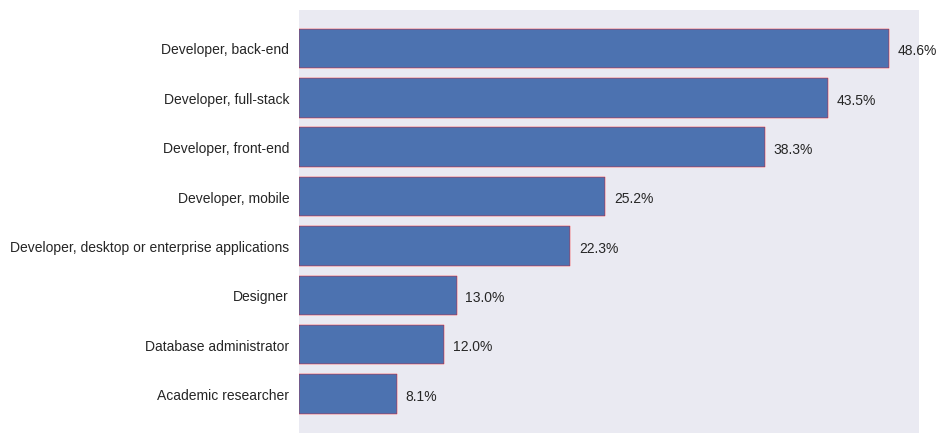

In [86]:
plt.style.use('seaborn')

# current lw users
lw = {}
for x in dfp.DevType.dropna():
    for d in x.split(';'):
        if d not in lw:
            lw[d] = 1   # create new instance
        else:
            lw[d] += 1  # increments that instance           
lw = {k:v for k,v in sorted(lw.items(), key=lambda x:x[1])}
pos = np.arange(0,len(lw.keys()), 1)
labels = [x for x in lw.keys()]
tot = dfp.LanguageWorkedWith.count()
pcnts = [round(100*x/tot, 1) for x in lw.values()]

fig = plt.figure()

plt.barh(labels[-8:], list(lw.values())[-8:], edgecolor='r')

for (y, p), x  in zip(enumerate(pcnts[-8:]), list(lw.values())[-8:]):
   plt.annotate("%.1f%%"%p, (x+5 ,y-0.125))
prettify(plt)


# Job Related

### Distribution of Hours Worked Weekly

Most of the Paki folks work for 35-50 hours per a week.<br>
Some hard working folks take it upto 90+ hours per week!

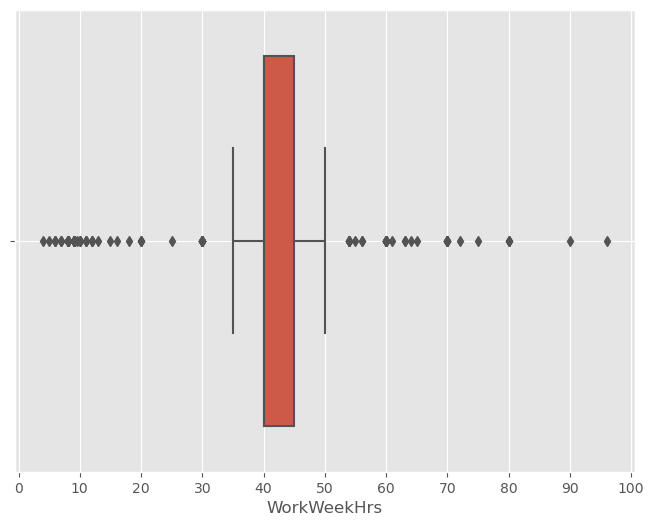

In [81]:
plt.style.use('ggplot')

fig= plt.figure(figsize=(8,6))
sns.boxplot(dfp[dfp.WorkWeekHrs<100].WorkWeekHrs)
plt.xticks(np.arange(0,101,10))
plt.grid(axis='y')

plt.style.use('default')

### Overtime Routine

WE WORK OVERTIME A LOT :-P

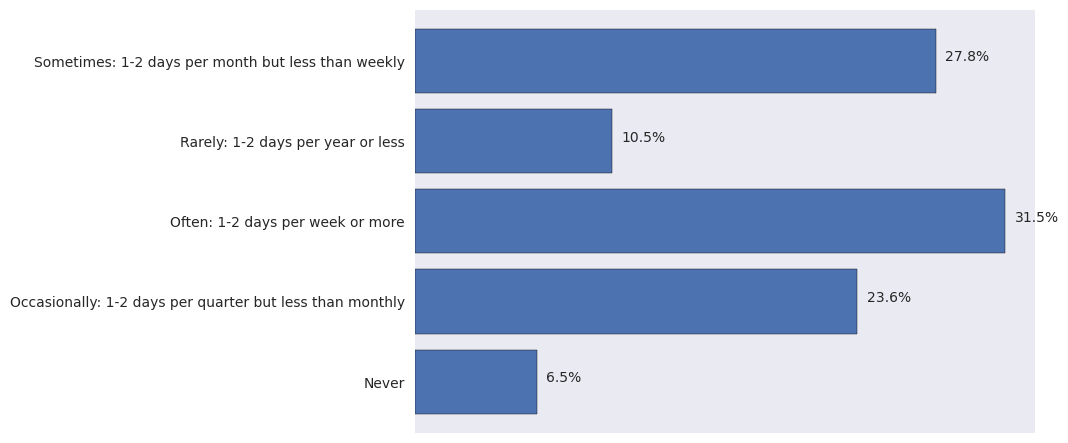

In [88]:
plt.style.use('seaborn')

dft = dfp.groupby(['NEWOvertime']).Respondent.count()
names = list(map(lambda x: x, dft.index))
nums = list(map(lambda x: dft[x], range(len(dft.index))))
pcnts = [round(100*x/sum(nums),1) for x in nums]

fig = plt.figure()
plt.barh(names, pcnts, edgecolor='k')
for y, p in enumerate(pcnts):
  plt.annotate("{}%".format(p), (p+0.5, y))
prettify(plt)

plt.style.use('default')

# Aptitudes and Trends

### What do you do when you get stuck?

Majority of folks visit StackOverflow when they get stuck

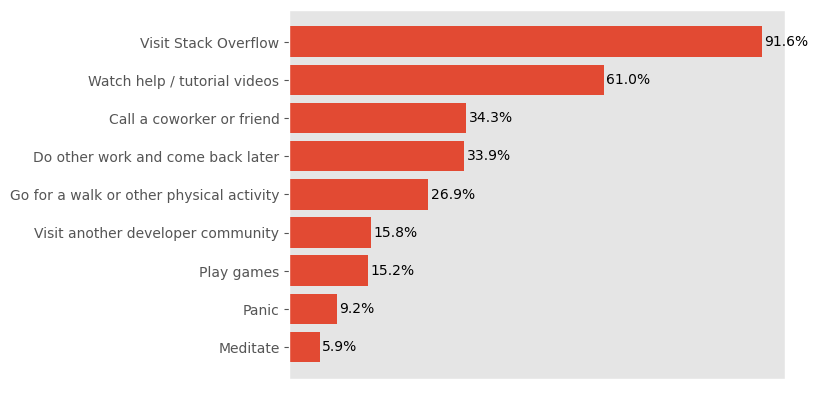

In [89]:
plt.style.use('ggplot')

uns = {}
for d in dfp.NEWStuck.dropna():
  for x in d.split(';'):
    if x not in uns:
      uns[x] = 1
    else:
      uns[x] += 1
uns = {k:v for k,v in sorted(uns.items(), key=lambda x:x[1])}

names = [x[:x.find('(')-1]if x=='Visit another developer community (please name):' else x for x in uns.keys()]
pcnts = [round(100*x/dfp.NEWStuck.dropna().count(),1) for x in uns.values()]

fig = plt.figure()
plt.barh(names, pcnts)
for y, p in enumerate(pcnts):
  plt.annotate("%.1f%%"%p, (p+0.5, y-0.1))
prettify(plt)

plt.style.use('default')

### Importance of Formal Education for career

Most of the folks think formal education is necessary.

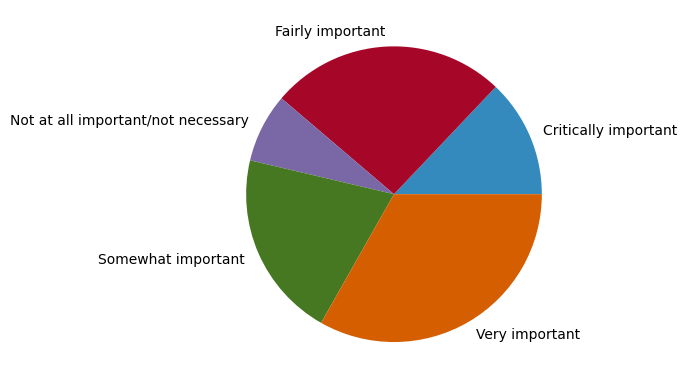

In [91]:
plt.style.use('bmh')

dft = dfp.groupby(['NEWEdImpt']).Respondent.count()
pies = [dft[x] for x in dft.index]
labels = [dft.index[x] for x in range(dft.shape[0])]

fig= plt.figure()
plt.pie(pies, labels=labels)

plt.style.use('default')

I guess that is all.<br>
I hope IT industry really boom in Pakistan and we get to see more and more talent rising from Pakistan.<br>
Best of luck, bhaiyo behno :)